1)Association Rule Generation from Transaction Data

(a) Download transaction dataset to your local drive.
(b) Download the ’Grocery Items {DATASET NUMBER}.csv’ file from the Google Drive Link.DATASET NUMBER is the number assigned to you earlier in the semester.

In [1]:
import pandas as pd

# Load the dataset
file_path = r'D:\Data Mining\Programming Assignment - 3\Data Files\Grocery_Items_5.csv'
data = pd.read_csv(file_path)

# Flatten the dataset to count unique items and their occurrences
flattened_items = data.values.flatten()

# Remove NaN entries
flattened_items = [item for item in flattened_items if pd.notnull(item)]

(c) 
• How many unique items are there in your dataset?
• How many records are there in your dataset?
• What is the most popular item in your dataset? How many transactions contain this item?

In [2]:
# Count unique items and their occurrences
unique_items = set(flattened_items)
item_counts = pd.Series(flattened_items).value_counts()

# Most popular item and its transaction count
most_popular_item = item_counts.idxmax()
most_popular_count = item_counts.max()

unique_item_count = len(unique_items)
total_records = len(data)

print(f"Number of Unique Items: {unique_item_count}")
print(f"Number of Records (Transactions): {total_records}")
print(f"Most Popular Item: {most_popular_item}")
print(f"Transactions Containing '{most_popular_item}': {most_popular_count}")

Number of Unique Items: 166
Number of Records (Transactions): 8000
Most Popular Item: whole milk
Transactions Containing 'whole milk': 1354


(d) Using minimum support = 0.01 and minimum confidence threshold = 0.08, what are the association rules you can extract from your dataset?

In [3]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Convert the cleaned dataset into a list of transactions, excluding empty items
transactions = data.fillna("").astype(str).values.tolist()
transactions = [[item for item in transaction if item] for transaction in transactions]

# Prepare the dataset for apriori algorithm
te = TransactionEncoder()
transformed_data = te.fit(transactions).transform(transactions)
df = pd.DataFrame(transformed_data, columns=te.columns_)

# Remove any empty string column if it exists
if "" in df.columns:
    df = df.drop("", axis=1)

# Generate frequent itemsets with a minimum support of 0.01
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules with a minimum confidence of 0.08
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.08)

print(rules)

          antecedents         consequents  antecedent support  \
0  (other vegetables)        (rolls/buns)            0.122625   
1        (rolls/buns)  (other vegetables)            0.108875   
2  (other vegetables)        (whole milk)            0.122625   
3        (whole milk)  (other vegetables)            0.158375   
4        (whole milk)        (rolls/buns)            0.158375   
5        (rolls/buns)        (whole milk)            0.108875   
6              (soda)        (whole milk)            0.098250   
7            (yogurt)        (whole milk)            0.084000   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.108875  0.010250    0.083588  0.767744 -0.003101    0.972407  
1            0.122625  0.010250    0.094145  0.767744 -0.003101    0.968560  
2            0.158375  0.014000    0.114169  0.720879 -0.005421    0.950097  
3            0.122625  0.014000    0.088398  0.720879 -0.005421    0.962454  
4            0.108875  0

(e) Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct): 0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from the dataset. Construct a heatmap using Seaborn data visualization library (https://seaborn.pydata.org/generated/seaborn.heatmap.html) to show the count results such that the x-axis is msv and the y-axis is mct.

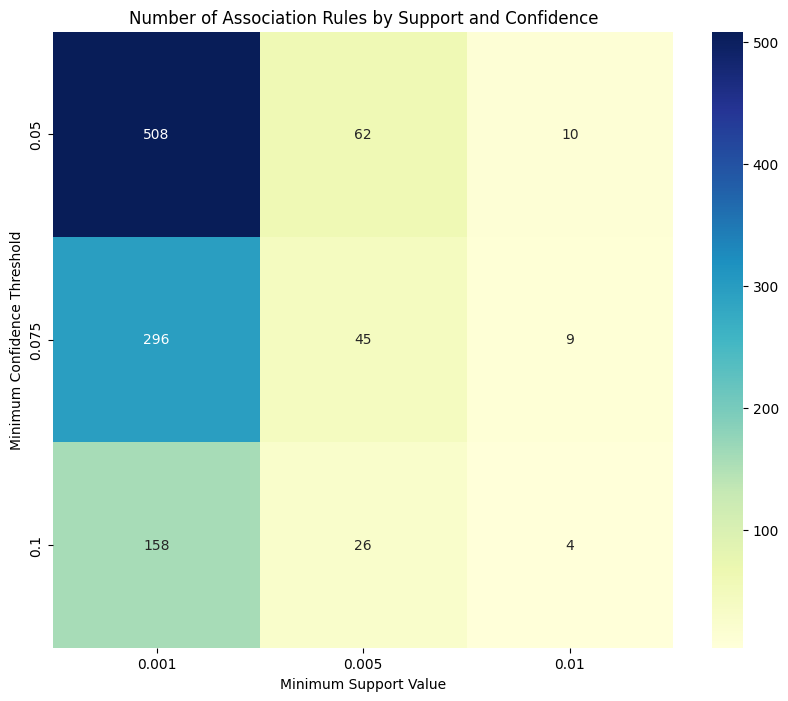

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# Prepare transactions
transactions = data.fillna("").astype(str).values.tolist()
transactions = [[item for item in transaction if item] for transaction in transactions]

# Encode the transactions
te = TransactionEncoder()
transformed_data = te.fit(transactions).transform(transactions)
df = pd.DataFrame(transformed_data, columns=te.columns_)
if "" in df.columns:
    df = df.drop("", axis=1)

# Define combinations of msv and mct
support_values = [0.001, 0.005, 0.01]
confidence_values = [0.05, 0.075, 0.1]
results = []

# Run apriori and extract rules for each combination
for support in support_values:
    frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
    for confidence in confidence_values:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        results.append({'msv': support, 'mct': confidence, 'rules_count': len(rules)})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
result_pivot = results_df.pivot(index='mct', columns='msv', values='rules_count')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(result_pivot, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Number of Association Rules by Support and Confidence')
plt.xlabel('Minimum Support Value')
plt.ylabel('Minimum Confidence Threshold')
plt.show()